# Below is a model to determine whether a person has COVID 19 based on some details about the person using Support Vector Machines

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import svm
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.model_selection import GridSearchCV
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv') #reading the data set

In [3]:
df.head()  #seeing the first five entries of the data set

,S. No.,Age,BodyTemp.,Fatigue,Cough,BodyPain,SoreThroat,BreathingDifficulty,Infected
0,1,94,98.603205,1,0,1,1,0,1
1,2,1,102.519485,0,1,1,0,2,1
2,3,65,101.799096,1,1,1,2,1,1
3,4,28,103.863706,0,1,0,1,2,0
4,5,75,102.155484,1,0,0,0,0,0


In [4]:
df.tail() #seeing the last five entries of the data set

,S. No.,Age,BodyTemp.,Fatigue,Cough,BodyPain,SoreThroat,BreathingDifficulty,Infected
3995,3996,16,103.380497,0,1,0,0,2,1
3996,3997,82,103.224004,0,1,1,0,0,1
3997,3998,73,104.103678,0,1,0,0,1,0
3998,3999,27,104.557772,1,0,0,2,0,1
3999,4000,43,100.320435,0,1,1,0,1,1


In [5]:
df.info()   #General information about the data set

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   S. No.               4000 non-null   int64  
 1   Age                  4000 non-null   int64  
 2   BodyTemp.            4000 non-null   float64
 3   Fatigue              4000 non-null   int64  
 4   Cough                4000 non-null   int64  
 5   BodyPain             4000 non-null   int64  
 6   SoreThroat           4000 non-null   int64  
 7   BreathingDifficulty  4000 non-null   int64  
 8   Infected             4000 non-null   int64  
dtypes: float64(1), int64(8)
memory usage: 281.4 KB


In [6]:
df.describe()  #Seeing the mathematics like count, mean etc for the data set

,S. No.,Age,BodyTemp.,Fatigue,Cough,BodyPain,SoreThroat,BreathingDifficulty,Infected
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.00000,4000.000000,4000.000000,4000.00000
mean,2000.500000,49.888750,101.542417,0.511000,0.507750,0.51150,1.013000,1.016250,0.66275
std,1154.844867,29.115937,2.025641,0.499941,0.500002,0.49993,0.823104,0.814341,0.47283
min,1.000000,1.000000,98.000139,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
25%,1000.750000,25.000000,99.793418,0.000000,0.000000,0.00000,0.000000,0.000000,0.00000
50%,2000.500000,49.000000,101.581286,1.000000,1.000000,1.00000,1.000000,1.000000,1.00000
75%,3000.250000,75.000000,103.274928,1.000000,1.000000,1.00000,2.000000,2.000000,1.00000
max,4000.000000,100.000000,104.996821,1.000000,1.000000,1.00000,2.000000,2.000000,1.00000


# Now lets check if we have any empty values

In [7]:
df.isnull().sum()

S. No.                 0
Age                    0
BodyTemp.              0
Fatigue                0
Cough                  0
BodyPain               0
SoreThroat             0
BreathingDifficulty    0
Infected               0
dtype: int64

# Looks like there are not any empty values! Lets check how many people are infected and how many are not

In [8]:
df['Infected'].value_counts()

1    2651
0    1349
Name: Infected, dtype: int64

# Now let's do some data visualisations!

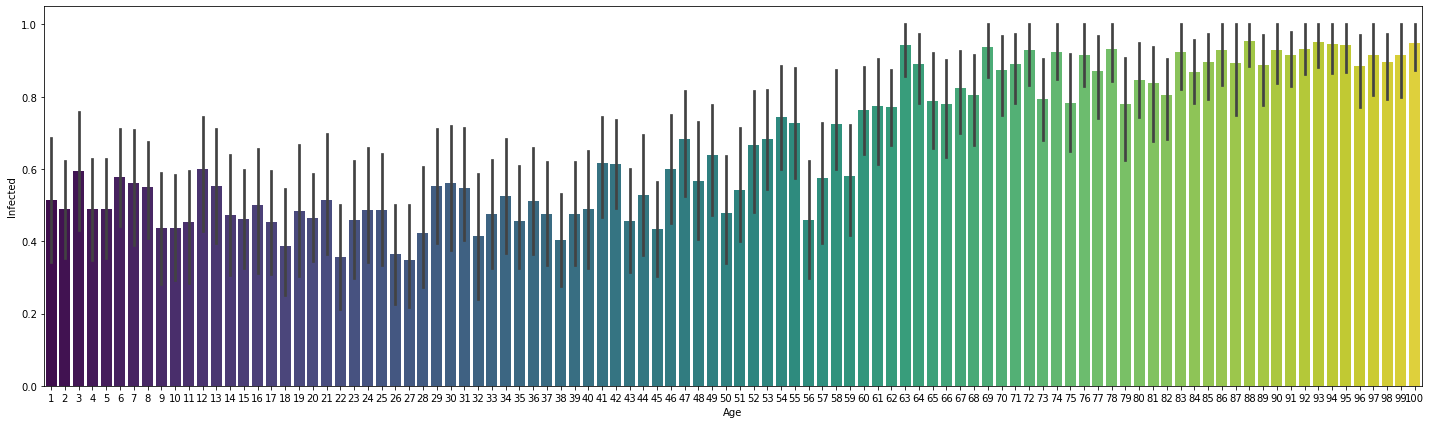

In [9]:
plt.figure(figsize=(20,6))
sns.barplot(x='Age',y='Infected',data=df,palette='viridis')
plt.tight_layout()

<AxesSubplot:xlabel='Cough', ylabel='Infected'>

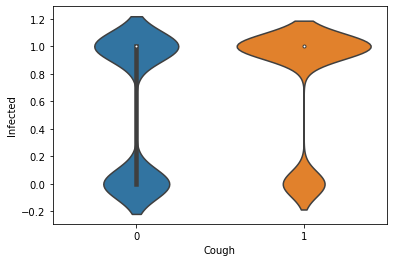

In [10]:
sns.violinplot(x='Cough',y='Infected',data=df)

<AxesSubplot:xlabel='BreathingDifficulty', ylabel='count'>

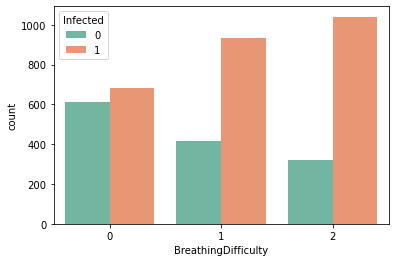

In [11]:
sns.countplot(x='BreathingDifficulty',hue='Infected',data=df,palette='Set2')

# Let us now declare the dependent and independent variables

In [12]:
X=df.drop('Infected',axis=1)  #independent variable
y=df['Infected']  #dependent variable

In [13]:
X.shape

(4000, 8)

In [14]:
y.shape

(4000,)

# Now let's define our model!

In [15]:
model=svm.SVC()

In [16]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=101) #to prepare training and testing data

In [17]:
X_train.shape

(2800, 8)

In [18]:
X_test.shape

(1200, 8)

In [19]:
y_train.shape

(2800,)

In [20]:
y_test.shape

(1200,)

In [21]:
model.fit(X_train,y_train) #training our model

SVC()

In [22]:
y_pred=model.predict(X_test)   #taking some predictions

In [23]:
print(classification_report(y_test,y_pred))    #seeing how well our model performed

              precision    recall  f1-score   support

           0       0.00      0.00      0.00       421
           1       0.65      1.00      0.79       779

    accuracy                           0.65      1200
   macro avg       0.32      0.50      0.39      1200
weighted avg       0.42      0.65      0.51      1200



C:\Users\avi_g\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avi_g\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\avi_g\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [24]:
print(confusion_matrix(y_test,y_pred))   #to see how many entries are correct and how many aren't

[[  0 421]
 [  0 779]]


# Our precision is only 50% whereas our recall and f1score for class 0 is 0.00 which is very bad. Lets see if we can improve that by tuning our hyperparameters

In [25]:
param_grid = {'C': [0.1, 1, 10, 100, 1000], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],   #declaring the hyperparameters
              'kernel': ['rbf']} 

In [26]:
grid = GridSearchCV(model, param_grid, refit = True, verbose = 3)   #creating our grid search model

In [27]:
grid.fit(X_train,y_train)    #training on our hyperparameters to see which combination is best

Fitting 5 folds for each of 25 candidates, totalling 125 fits
[CV 1/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.5s
[CV 2/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.6s
[CV 3/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.7s
[CV 4/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 5/5] END .....................C=0.1, gamma=1, kernel=rbf; total time=   0.4s
[CV 1/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 2/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 3/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 4/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 5/5] END ...................C=0.1, gamma=0.1, kernel=rbf; total time=   0.4s
[CV 1/5] END ..................C=0.1, gamma=0.01, kernel=rbf; total time=   0.4s
[CV 2/5] END ..................C=0.1, gamma=0.0

[CV 2/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.6s
[CV 3/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.5s
[CV 4/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.6s
[CV 5/5] END ....................C=1000, gamma=1, kernel=rbf; total time=   0.5s
[CV 1/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 2/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 3/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 4/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.5s
[CV 5/5] END ..................C=1000, gamma=0.1, kernel=rbf; total time=   0.6s
[CV 1/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.5s
[CV 2/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.5s
[CV 3/5] END .................C=1000, gamma=0.01, kernel=rbf; total time=   0.7s
[CV 4/5] END ...............

GridSearchCV(estimator=SVC(),
             param_grid={'C': [0.1, 1, 10, 100, 1000],
                         'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['rbf']},
             verbose=3)

In [28]:
grid.best_params_   #to get the best parameters

{'C': 1000, 'gamma': 0.0001, 'kernel': 'rbf'}

In [29]:
grid.best_estimator_    #seeing the best hyperparameters

SVC(C=1000, gamma=0.0001)

In [30]:
grid_predictions=grid.predict(X_test)  #taking some predictions on the new hyperparameters

In [31]:
print(classification_report(y_test,grid_predictions))

              precision    recall  f1-score   support

           0       0.72      0.61      0.66       421
           1       0.80      0.87      0.84       779

    accuracy                           0.78      1200
   macro avg       0.76      0.74      0.75      1200
weighted avg       0.77      0.78      0.77      1200



In [32]:
print(confusion_matrix(y_test,grid_predictions))

[[256 165]
 [102 677]]


In [33]:
677+256

933

In [34]:
102+165

267

# Now our model has improved a lot in predicting class 0. Now lets take a random patient and see whether our model predicted it correctly or not

In [35]:
import random
random.seed(101)
person=random.randint(0,len(df)-1)

In [36]:
new_customer=df.drop('Infected',axis=1).iloc[person]

In [37]:
pred=grid.predict(new_customer.values.reshape(1,-1))   #taking predictions for the random person

In [38]:
pred  #result came 1 meaning our random person has covid

array([1], dtype=int64)

In [39]:
df.iloc[person]  #from our data, the person does have covid. So our model predicted it correctly!

S. No.                 2381.000000
Age                      87.000000
BodyTemp.               104.014397
Fatigue                   0.000000
Cough                     0.000000
BodyPain                  0.000000
SoreThroat                0.000000
BreathingDifficulty       0.000000
Infected                  1.000000
Name: 2380, dtype: float64